Lab #1 

A little statistics

We will start by conveting probabilities into simga and back again.

1)
B. 
Using the z table we can look up for different sigmas 
and use that to make sure the interagls below are giving the expected values. 
we expetect to see for the comulative z values
z=0 -> p = 0.5
z=0.1 -> p = 0.53983
z=1 -> p = 0.84134
z=2 -> p = 0.97725
z=-2 -> p = 0.02275

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import seaborn as sb
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#1 B
#cheack if intergral matches z tables 
print(stats.norm.cdf(0))
print(stats.norm.cdf(0.1))
print(stats.norm.cdf(1))
print(stats.norm.cdf(2))
print(stats.norm.cdf(-2))
#those numbers look good for probility at a given sigma listed above up to 5 sig figs

0.5
0.539827837277029
0.8413447460685429
0.9772498680518208
0.022750131948179195


In [6]:
#1 C
# check if we can go backwards
print(stats.norm.ppf(0.5))
print(stats.norm.ppf(0.8413))
print(stats.norm.ppf(0.9772498680518208))
print(stats.norm.ppf(0.377))
print(stats.norm.ppf(0.1652))
print(stats.norm.ppf(stats.norm.cdf(-2)))
# These numbers also look good

0.0
0.9998150936147446
2.0000000000000004
-0.313369438883806
-0.9733084983286292
-2.000000000000001


D.
A negative sigma shows up for a probability of less than ½.
This means that the calculation is using a cumulative distribution function of the standard normal distribution. that is the area under a standard normal to the left of some simga with sigma being zero at the mean. This will mean that if we are looking at the right tail we will need to subtract the probability from one in order to get a positive sigma which is convention.
More generally any intergarl that does not go past the mean will have a negative sigma so it is useful to alway be aware of which tail we are integrating

2)
I have chosen to use a Rayleigh distribution for this part. 
The Rayleigh is basically the magnitude of a 2D random variable (this could be a vector or even a complex number as long as we have two degrees of freedom)with each random variable being normally distributed. 

B. Graphs are generated below both linear and semilog graphs

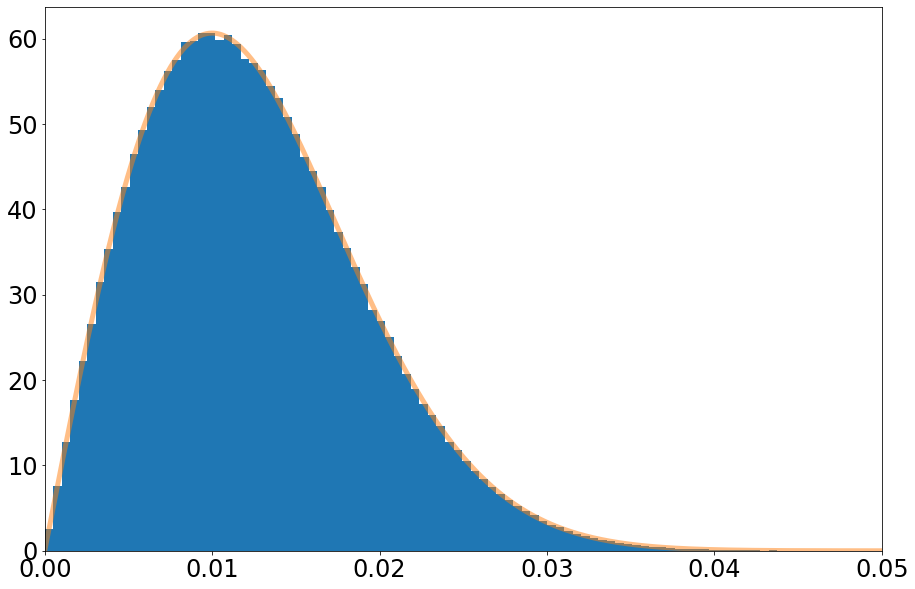

In [21]:
#making plot 
d = stats.rayleigh.rvs(loc = 0 , scale = 0.01, size = 1000000)
fig, ax = plt.subplots(1,1)
ax.hist(d,100, density= True)
plt.tick_params(labelsize = 24)
plt.xlim([0,0.05])
x = np.linspace(0,0.05,10000)
ax.plot(x,stats.rayleigh.pdf(x,loc=0.,scale = 0.01), linewidth = 5, alpha = .5)
plt.show()

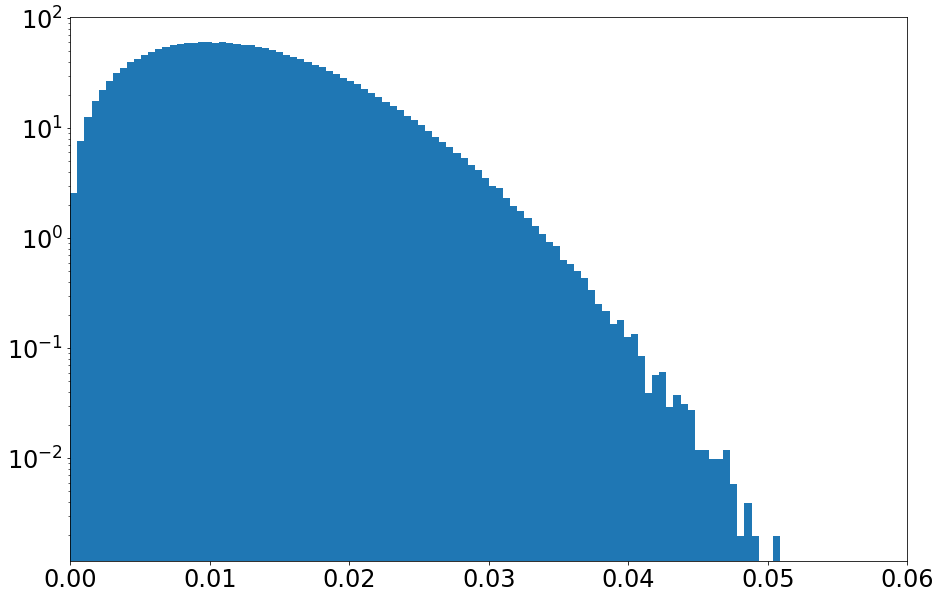

In [25]:
#now lets stick this into a semi log graph just for fun
fig, ax = plt.subplots(1,1)
ax.hist(d,100,density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,0.06])
plt.yscale('log')

3) 
A.
Let's say we have founds a signal at the value of 0.045

B.
What is the probability of getting a signal with a value of 0.045 or higher actually be due to the background noise. If the background noise is Rayleigh distributed with a scale of 0.01 like in the graphs above. 

C. 
The integral that would solve for that probability would be the integral of the rayleigh dist with lower bound at 0.045 and upper bound at infinity

D. 
Calculating the probability of the background producing the signal we get 
P = 4e-5

In [26]:
prob = 1 - scipy.stats.rayleigh.cdf(0.045,loc=0,scale = 0.01)
#this is the probability of getting a signal of 3.04 or higher from the background noise
#we are actually doing an integral from minus infinity to 0.045 and then subtracting 
#that form one. Which is equivalent to what has been stated in part C.
print(prob)

4.006529739297715e-05


E. 
We calculate a sigma of 3.944

In [31]:
sigma = stats.norm.ppf(1-prob)
print(sigma)
#so we have 3.944 sima signal

3.9440091612702726


4.
one thing of interest is to look at the limits of the approximations that python is using to calculate the sigmas, for a Rayleigh dist we expect the sigma to be minus infinity at value of 0. Now python is treating any number less than  0.0000000001053 same as zero which means there is a significant rounding error here. we can do the same for the other end of the curve, the raylight falls off fast on the right tails but we should not get a sigam if infinity until we reach an upper bound of infinity, but the same rounding error seen above will come into effect at a relatively fast interval, for the case of a scale of 0.01 we see the effect for values of 0.0865216132 or above, which good to keep in mind.


In [89]:
signal = 0.05
prob = 1 - scipy.stats.rayleigh.cdf(signal,loc=0,scale = 0.01)
sigma = stats.norm.ppf(1-prob)
print(sigma)
signal = 0.000000000106
prob = 1 - scipy.stats.rayleigh.cdf(signal,loc=0,scale = 0.01)
sigma = stats.norm.ppf(1-prob)
print(sigma)
signal = 0.0000000001053
prob = 1 - scipy.stats.rayleigh.cdf(signal,loc=0,scale = 0.01)
sigma = stats.norm.ppf(1-prob)
print(sigma)
signal = 0.0865216132
prob = 1 - scipy.stats.rayleigh.cdf(signal,loc=0,scale = 0.01)
sigma = stats.norm.ppf(1-prob)
print(sigma)

4.4803146987717914
-8.209536151601387
-inf
inf


Non-continuous distributions

1)
A.I will be using a binomial distribution. The binomial has two parameters one signifies the success rate of some boolean event and the second the number of events we are looking at.

B. the four garpehs below are varing both n and p

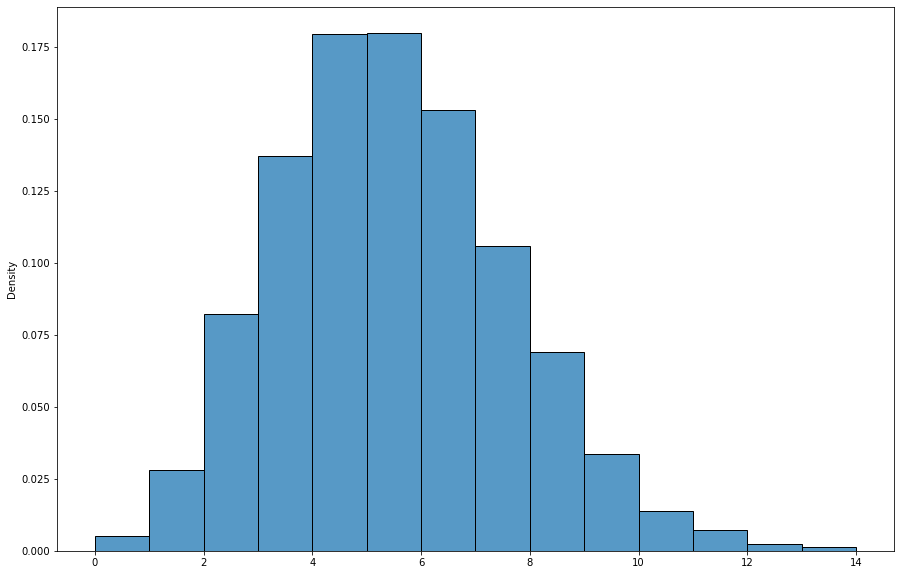

In [90]:
n , size , p = 50 , 10000, 0.1
y = stats.binom.rvs(n, p , size = size)
ax = sb.histplot(y,stat = 'density',binwidth = 1)

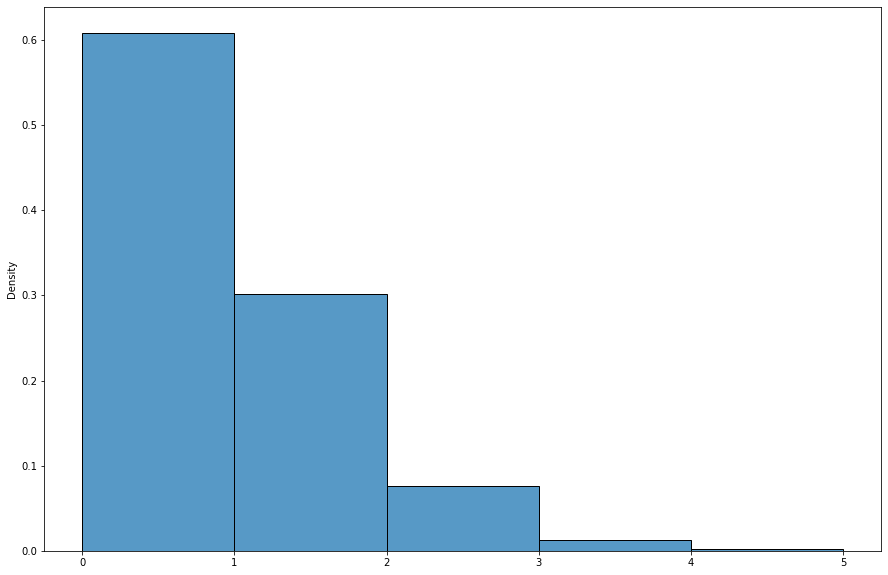

In [91]:
n , size , p = 50 , 100000, 0.01
y = stats.binom.rvs(n, p , size = size)
ax = sb.histplot(y,stat = 'density',binwidth = 1)

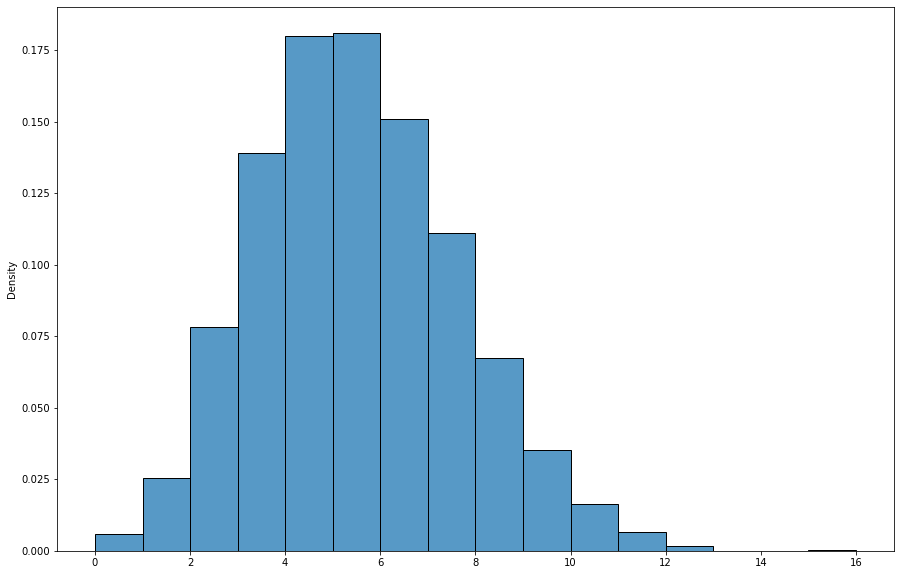

In [92]:
n , size , p = 50 , 10000, 0.1
y = stats.binom.rvs(n, p , size = size)
ax = sb.histplot(y,stat = 'density',binwidth = 1)

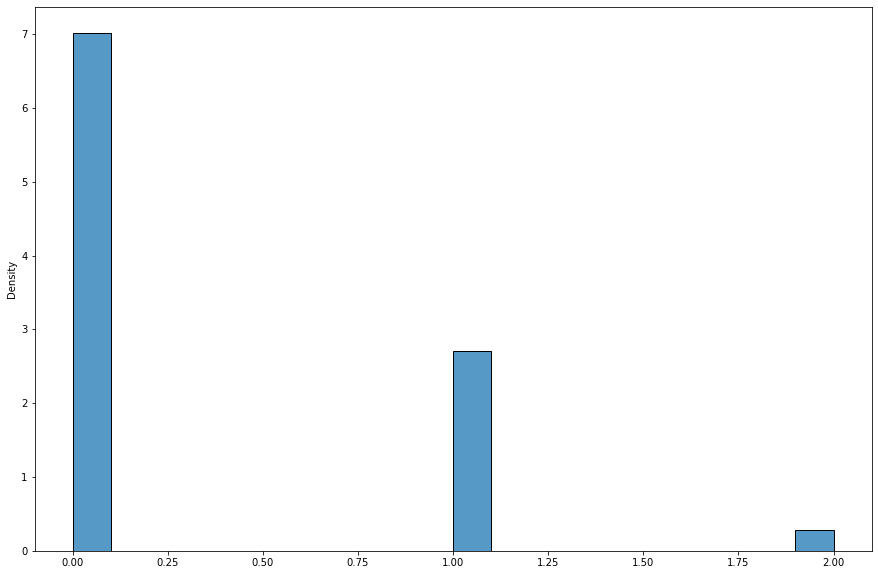

In [99]:
#this is the odds of a role of a pair of dice having some number show up on each die
#we can use this to calculate the odds of getting snake eyes, which we will do in a moment
n , size , p = 2 , 10000, 1/6
y = stats.binom.rvs(n, p , size = size,loc = 0)
ax = sb.histplot(y,stat = 'density',binwidth = 0.1)

C.
let's say we want to know the odds of calculating snake eyes for a roll of a pair of dice
we can use a binomial with p = 1/6 and n=2 this will in fact give use the distribution for any specific value showing up for a pair of roles since we have a boolean conditions with independent trials
we calculated below a probability of 1/36 as expected adn a sigma of 1.914

In [112]:
n , size , p = 2 , 10000, 1/6
prob = 1-scipy.stats.binom.cdf(1.5,n,p)
print(prob)
sigma = stats.norm.ppf(1-prob)
print(sigma)

0.02777777777777779
1.9145058250555569


D.
Having discrete probabilities in a distribution means we will have to take more data before seeing a convergence to a probability distribution, this is because there is now a finite number of outcomes and we have to keep in mind bin sizes when dealing with variblingy in masuments 

E.
The mean can be continuous since it is an average of a number of discrete values. Lets take a binomial distribution and look at the mean value, the mean value depends on the number of trailers and the pobabiity of success (sicne the overal shap of the sitrabuin is depande on those two values) now te numbe of trials is discrete but the povlity of a success is continuous. This make sense since we can tweak an ecpsrmant to have nay probability of intace bullying an unfair coin by adding wight to one side veses the other. As we vary this contiouse perater it will derrectly effect the mean. Once we do set the parameters then the whole funcoins because decreat so the probability will have distinct 
